### 5.5 연습문제 8번
선형적으로 분리되는 데이터셋에 LinearSVC를 훈련시켜보세요. 그런 다음 같은 데이터셋에 SVC와 SGDClassifier를 적용해보세요. 거의 비슷한 모델이 만들어지는지 확인해보세요.

In [1]:
import os
import numpy as np

np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

In [2]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [3]:
iris=datasets.load_iris()
X=iris["data"][:,(2,3)]
y=iris["target"]

In [4]:
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
#LinearSVC
svm_clf = SVC(kernel="linear", C=5.0)
svm_clf.fit(X_scaled, y)

SVC(C=5.0, kernel='linear')

In [6]:
#SGDClassifier
m=len(X)
C=5
sgd_clf=SGDClassifier(loss="hinge",alpha=1/(m*C))
sgd_clf.fit(X_scaled, y)

SGDClassifier(alpha=0.002)

In [7]:
print("Linear SVC:", svm_clf.intercept_, svm_clf.coef_)
print("SGD Classifier:", sgd_clf.intercept_, sgd_clf.coef_)

Linear SVC: [0.31896852] [[1.1203284  1.02625193]]
SGD Classifier: [0.62357843] [[1.39532881 1.67285447]]


In [8]:
svm_w=-svm_clf.coef_[0,0]/svm_clf.coef_[0,1]
svm_b=-svm_clf.intercept_[0]/svm_clf.coef_[0,1]

sgd_w=-sgd_clf.coef_[0,0]/sgd_clf.coef_[0,1]
sgd_b=-sgd_clf.intercept_[0]/sgd_clf.coef_[0,1]

svm_line=scaler.inverse_transform([[-10,-10*svm_w+svm_b],[10,10*svm_w+svm_b]])
sgd_line=scaler.inverse_transform([[-10,-10*sgd_w+sgd_b],[10,10*sgd_w+sgd_b]])

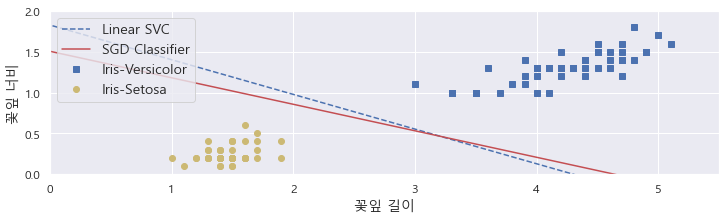

In [9]:
plt.figure(figsize=(12,3))
plt.plot(svm_line[:,0],svm_line[:,1],"b--",label="Linear SVC")
plt.plot(sgd_line[:,0],sgd_line[:,1],"r-",label="SGD Classifier")

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

비슷한 모델이 만들어지는걸 확인할 수 있다. 

### 6.10 연습문제 2번
한 노드의 지니 불순도가 보통 그 부모 노드보다 작을까요, 아니면 클까요? 일반적으로 작거나 클까요, 아니면 항상 작거나 클까요? 이유와 함께 서술해주세요.

한 노드의 지니 불순도는 일반적으로 그 부모 노드보다 작다. 일반적으로 결정 트리 훈련 시 CART 알고리즘을 사용하는데 이 알고리즘은 서브셋을 나눌 때 왼쪽, 오른쪽 서브셋의 불순도의 가중평균인 비용함수를 최소화하는 방향으로 나누기 때문이다.   
그러나 노드 하나하나를 보면 항상 부모 노드의 불순도보다 작아진다고 보긴 어렵다. 부모 노드의 불순도가 0이 아닌 이상(순수 노드가 아닌 이상) 자녀 노드 중 최소한 둘 중 하나는 순수 노드가 아니게 된다. 만약 자녀 노드의 한 쪽이 순수 노드가 된다면 나머지 한 노드는 부모 노드에 비해 전체 샘플 수는 감소하였지만 서로 다른 클래스의 샘플이 여전히 존재하기 때문에 불순도가 부모 노드에 비해 커지게 된다. 그러나 여전히 CART 알고리즘에 의해 전체 자녀 노드의 지니 불순도는 부모 노드에 비해 작다.  

### 6.10 연습문제 3번 변형
결정 트리가 훈련 세트에 과대적합되었을 때의 해결방안을 2가지 이상 서술해주세요. (어떤 하이퍼파라미터를 어떻게 조정해야하는지를 서술하시면 됩니다.)

트리의 최대 깊이인 max_depth 줄인다.  
리프 노드의 최대 샘플 개수인 max_leaf_nodes 를 감소시킨다.   